<a href="https://colab.research.google.com/github/lourencocavalcante/Introduction-to-Data-Science/blob/main/INPE_CAP351_ProjetoFinal_RNN_LSTM_Lourenco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-351 Neurocomputação**

**Professor:**
*Dr. Marcos Goncalves Quiles*

**Aluno:**
*Lourenço José Cavalcante Neto*

---

**PROJETO FINAL:  Implementação e treino de um modelo de Rede Neural para predição de chuva em curtíssimo prazo a partir de dados metorológicos dos equipamentos disdrômetro RD80 e Radiômetro de microondas MP3000A**

* Um projeto de ML com EDA e modelo que ajuda a prever a chuva do instante seguinte treinando modelo de classificação na variável de destino Class_Rain


2. Predição. Treinar um modelo para predizer o valor de uma variável no instante **t+k**. O modelo deve receber os dados da série temporal (instantes anteriores a **t** – verificar tamanho da janela) e predizer um favor futuro. **k** a distância da predição. *Por exemplo, podemos alimentar um modelo com dados de uma dada empresa (i.e. **PETR3**) e tentar predizer qual será o valor da ação daqui **5 dias (k==5)**.*


# **Descrição do problema**
Este conjunto de dados contém cerca de 2 anos de observações meteorológicas diárias oriundos de dois equipamentos ( Radiômetro de Microondas MP3000A e o Disdrômetro RD80) instalados nas proximidades da torre ATTO, em sítio chamado Campina, na região amazônica.

Rain Intensity é a variável de destino na qual será utilizada para predizer a chuva. Significa - choveu no dia seguinte, sim ou não? Esta coluna é Sim se a chuva naquele dia foi maior que 0.1 mm/h.

# **Objetivo**
O presente trabalho tem por objetivo implementar e treinar um modelo de rede neural **LSTM (Long Short Term Memory)** para predição de chuva com base nos dados do disdrômetro **RD80**. Este equipamento mede adistribuição das gotas de chuva que chegam à superfície. O modelo computacional contribuirá coma a capacidade de antecipar informações sobre "estar chovendo" ou "não".

# **Introdução**
Para o desenvolvimento do presente trabalho, inicialmente partirei de uma breve visualização dos dados do nosso Dataset. Em seguida, será implementado e treinando um modelo LSTM, tal qual será utilizado para predizer a ocorrência de chuva.

# **Recurrent Neural Network (RNN)**
Uma (RNN) é uma classe de redes neurais que inclui conexões ponderadas dentro de uma camada. Como as RNNs incluem loops, elas podem armazenar informações ao processar novas entradas. Essa memória os torna ideais para tarefas de processamento onde as entradas anteriores devem ser consideradas (no nosso caso, dados da série temporal). 

**Long Short Term Memory (LSTM)**

Em resumo, uma célula LSTM pode aprender a reconhecer uma entrada importante (que é o papel do input gate), armazená-la no estado de longo prazo, aprender a preservá-la pelo tempo necessário (esse é o papel do forget gate) e aprender a extraí-la sempre que for preciso. Isso explica por que elas têm sido surpreendentemente bem-sucedidas em capturar padrões de longo prazo em séries temporais.

<img src="https://github.com/lourencocavalcante/Neurocomputacao/blob/1494f13955de226380c002fe2774d8641ca2efc6/Figuras/RNN_LSTM.png?raw=true" width = 600 align="left">


# **Bibliotecas/Pacotes**

In [142]:
import pandas as pd
import seaborn as sns

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import Flatten
#from keras.optimizers import Adam, SGD
from math import sqrt
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
import numpy as np
from array import array

import datetime
import time
import math
import calendar


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


# **Dataset**

Os Dados são de um equipamento chamado Disdrômetro RD80 (também conhecido como Joss), instalado próximo à torre ATTO, em um sítio chamado Campina, na região amazônica, nos quais foram adquiridos e salvos no google Drive. Este equipamento mede a distribuição das gotas de chuva que chegam à superfície.  Os dados são referente ao período de **17/03/2020** à **29/06/2022**,

**Importação, formatação, tratamento e visualização dos dados**

In [143]:
#Vamos baixar os dados do Google Drive para o ambiente de execução do nosso Notebook

!gdown --id 1-OrjDXmZtcgtC25HVrH52llyUmclvpXs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-OrjDXmZtcgtC25HVrH52llyUmclvpXs
To: /content/df_MP3000A_RD80_final.csv
100% 508M/508M [00:01<00:00, 331MB/s]


In [144]:
#Carregar o Dataset e criar o Dataframe
df_MP3000A_RD80 = pd.read_csv("/content/df_MP3000A_RD80_final.csv",parse_dates=[0], index_col=[0])
df_MP3000A_RD80_final = pd.DataFrame(df_MP3000A_RD80)



**Pré-processamento e visualização os dados**

O primeiro passo é abrir o CSV com o Pandas. Em uma visão inicial dos dados, temos:

In [145]:
#Vamos visualizar alguns registros do nossos dados
df_MP3000A_RD80_final.head().append(df_MP3000A_RD80_final.tail())

,Datetime,Date,Year,Month,Day_of_week,Time,session,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,...,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain
222193,2022-01-11 12:22:29,2022-01-11,2022,Jan,Tuesday,12:22:29,Morning,0.0,0.00000,0.00000,...,0.000,0.000,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
222194,2022-01-11 12:22:58,2022-01-11,2022,Jan,Tuesday,12:22:58,Morning,0.0,0.00000,0.00000,...,0.000,0.000,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
222195,2022-01-11 12:23:00,2022-01-11,2022,Jan,Tuesday,12:23:00,Morning,0.0,0.00000,0.00000,...,4.551,0.489,2.25,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
222196,2022-01-11 12:23:02,2022-01-11,2022,Jan,Tuesday,12:23:02,Morning,0.0,0.00000,0.00000,...,0.000,0.000,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
222197,2022-01-11 12:23:31,2022-01-11,2022,Jan,Tuesday,12:23:31,Morning,0.0,0.00000,0.00000,...,0.000,0.000,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
222188,2022-06-29 09:05:00,2022-06-29,2022,Jun,Wednesday,09:05:00,Morning,0.0,0.06064,0.00059,...,-999.990,-999.990,-999.99,0.00,0.00,0.00,0.00,1.0,0.0,Não choveu
222189,2022-06-29 09:06:00,2022-06-29,2022,Jun,Wednesday,09:06:00,Morning,0.0,0.08150,0.00074,...,-999.990,-999.990,-999.99,0.00,0.00,0.00,0.00,1.0,0.0,Não choveu
222190,2022-06-29 09:07:00,2022-06-29,2022,Jun,Wednesday,09:07:00,Morning,0.0,0.12418,0.00095,...,-999.990,-999.990,-999.99,0.00,0.00,0.00,0.00,1.0,0.0,Não choveu
222191,2022-06-29 09:08:00,2022-06-29,2022,Jun,Wednesday,09:08:00,Morning,0.0,0.10235,0.00088,...,-999.990,-999.990,-999.99,0.00,0.00,0.00,0.00,1.0,0.0,Não choveu
222192,2022-06-29 09:09:00,2022-06-29,2022,Jun,Wednesday,09:09:00,Morning,0.0,0.00000,0.00000,...,-999.990,-999.990,-999.99,0.00,0.00,0.00,0.00,1.0,0.0,Não choveu


Dado o tamanho do nosso Dataset, isso pode ocasionar um custo computacional muito elevado durante a EDA. Vamos reduzir os dados para o tamanho do nosso interesse.

In [146]:
df_MP3000A_RD80_final= df_MP3000A_RD80_final.query("(DataQuality == 1)")

#Aqui verificamos o tamanho do Dataset e quantidade de atributos 
print('Tamanho do dataset: ',df_MP3000A_RD80_final.shape[0], ' - Quantidade de atributos: ', df_MP3000A_RD80_final.shape[1])

Tamanho do dataset:  983707  - Quantidade de atributos:  49


In [147]:
df_MP3000A_RD80_final.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time', 'session',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'DataQuality', 'Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain'],
      dtype='object')

Vamos selecionar somente as colunas que iremos utilizar a partir daqui.

In [148]:
df_MP3000A_RD80_temp = df_MP3000A_RD80_final

In [149]:
df_MP3000A_RD80_final.drop('Datetime', axis = 1, inplace = True)

In [150]:
df_MP3000A_RD80_final = df_MP3000A_RD80_final[['session',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km', 'Class_Rain']]

In [151]:
#To plot the graph

tot_choveu, tot_nao_choveu = round(df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['Rain_Intensity_mm_h'] > 0].Rain_Intensity_mm_h.count()), round(df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['Rain_Intensity_mm_h'] == 0].Rain_Intensity_mm_h.count())
print(tot_choveu)
print(tot_nao_choveu)



1404
982303


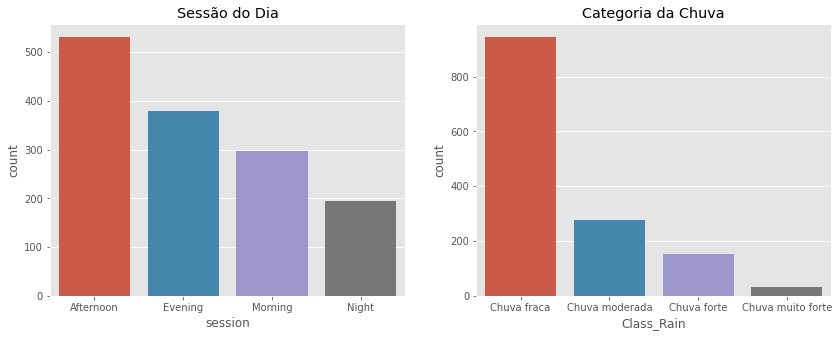

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(ax=axes[0], x='session',data=df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['Rain_Intensity_mm_h'] > 0])
axes[0].set_title('Sessão do Dia')
sns.countplot(ax=axes[1], x='Class_Rain',data=df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['Rain_Intensity_mm_h'] > 0])
axes[1].set_title('Categoria da Chuva')
plt.show()

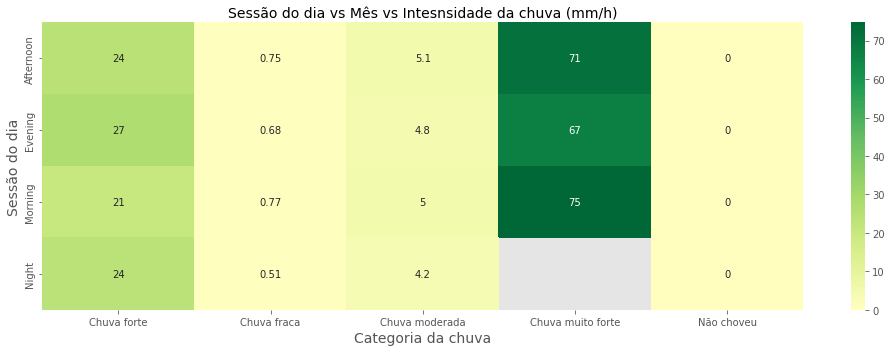

In [153]:
# Criando heatmap de Sessão do dia vs Mês vs Intesnsidade da chuva (mm/h)
result = pd.pivot_table(data=df_MP3000A_RD80_final, index='session', columns='Class_Rain', values='Rain_Intensity_mm_h')
plt.figure(figsize=(14, 5))
heatmap = sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
heatmap.set_title('Sessão do dia vs Mês vs Intesnsidade da chuva (mm/h)', fontdict={'fontsize':14}, pad=5);
plt.ylabel("Sessão do dia", fontdict={'fontsize':14})
plt.xlabel("Categoria da chuva", fontdict={'fontsize':14})
plt.tight_layout()
plt.savefig('heatmap2.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # This is added back by InteractiveShellApp.init_path()


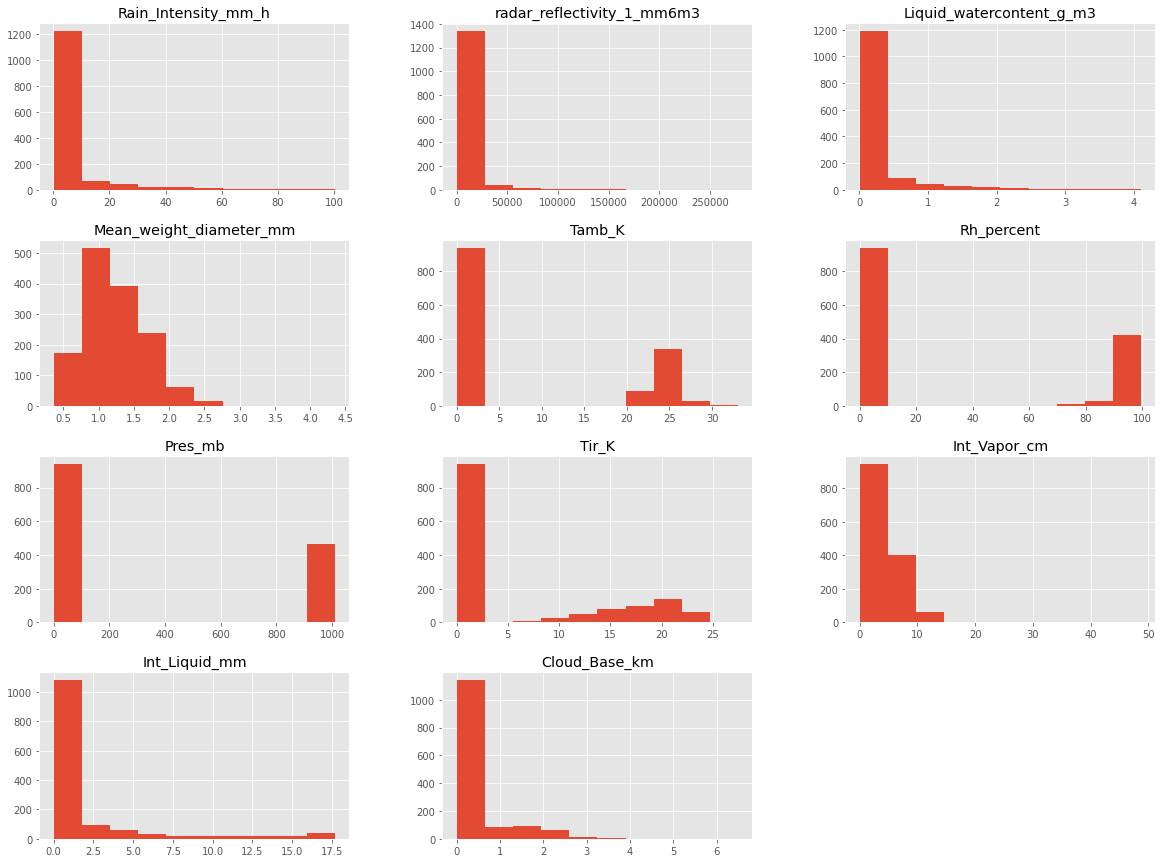

In [154]:
#Vamos plotar o gráfico em dados numéricos

df = df_MP3000A_RD80_final[['Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm','Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km']]


fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.loc[df['Rain_Intensity_mm_h'] > 0].hist(ax=ax)
plt.show()

In [155]:
max_min = df_MP3000A_RD80_final.groupby('session').sum()[['Rain_Intensity_mm_h']].sort_values(by = 'Rain_Intensity_mm_h', ascending = False)
max_min

,Rain_Intensity_mm_h
session,
Afternoon,3601.56375
Evening,2507.41609
Morning,1488.36514
Night,298.24168


Vamos separar os recursos **numéricos** e **categóricos**

In [156]:
df_MP3000A_RD80_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983707 entries, 222193 to 1190465
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   session                     983707 non-null  object 
 1   Rain_Intensity_mm_h         983707 non-null  float64
 2   radar_reflectivity_1_mm6m3  983707 non-null  float64
 3   Liquid_watercontent_g_m3    983707 non-null  float64
 4   Mean_weight_diameter_mm     983707 non-null  float64
 5   Tamb_K                      983707 non-null  float64
 6   Rh_percent                  983707 non-null  float64
 7   Pres_mb                     983707 non-null  float64
 8   Tir_K                       983707 non-null  float64
 9   Ch_22_234                   983707 non-null  float64
 10  Ch_22_500                   983707 non-null  float64
 11  Ch_23_034                   983707 non-null  float64
 12  Ch_23_834                   983707 non-null  float64
 13  Ch_25_00

In [157]:
#Separando recursos numéricos e categóricos

categorical_features = [column_name for column_name in df_MP3000A_RD80_final.columns if df_MP3000A_RD80_final[column_name].dtype == 'O']
numerical_features=[column_name for column_name in df_MP3000A_RD80_final.columns if df_MP3000A_RD80_final[column_name].dtype != 'O']
print('Numéricos:',numerical_features,'\n')
print('Categoricos:',categorical_features)

Numéricos: ['Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm', 'Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm', 'Cloud_Base_km'] 

Categoricos: ['session', 'Class_Rain']


In [158]:
# Handling NaN values in numerical cols

for  i in numerical_features:
    df_MP3000A_RD80_final[i][df_MP3000A_RD80_final[i] == -1273.14] = -273.15


for  i in numerical_features:
    df_MP3000A_RD80_final[i][df_MP3000A_RD80_final[i] == -999.99] = 0

for  i in numerical_features:
    df_MP3000A_RD80_final[i][df_MP3000A_RD80_final[i] == 0] = df_MP3000A_RD80_final[i].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-

In [159]:
df_MP3000A_RD80_final['Tir_K']

222193     10.680000
222194      1.057102
222195      1.057102
222196      7.030000
222197      1.057102
             ...    
1190461     1.057102
1190462    20.920000
1190463     1.057102
1190464     1.057102
1190465    20.660000
Name: Tir_K, Length: 983707, dtype: float64

In [160]:
#Vamos visualizar os dados novamente
df_MP3000A_RD80_final.head(n=5).append(df_MP3000A_RD80_final.tail(n=5))

,session,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Tamb_K,Rh_percent,Pres_mb,Tir_K,Ch_22_234,...,Ch_55_500,Ch_56_020,Ch_56_660,Ch_57_288,Ch_57_964,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Class_Rain
222193,Morning,0.008026,6.633712,0.000388,0.002235,27.710000,77.340000,1007.910000,10.680000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,Não choveu
222194,Morning,0.008026,6.633712,0.000388,0.002235,8.457465,30.584954,336.724807,1.057102,-188.792000,...,19.109000,20.065000,22.59000,22.014000,20.652000,17.816000,1.871372,0.176459,1.222154,Não choveu
222195,Morning,0.008026,6.633712,0.000388,0.002235,8.457465,30.584954,336.724807,1.057102,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,4.551000,0.489000,2.250000,Não choveu
222196,Morning,0.008026,6.633712,0.000388,0.002235,27.720000,78.570000,1007.810000,7.030000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,Não choveu
222197,Morning,0.008026,6.633712,0.000388,0.002235,8.457465,30.584954,336.724807,1.057102,-189.599000,...,18.524000,20.211000,21.26800,21.929000,21.693000,21.442000,1.871372,0.176459,1.222154,Não choveu
1190461,Morning,0.008026,6.633712,0.000388,0.002235,8.457465,30.584954,336.724807,1.057102,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,5.400000,0.176459,1.222154,Não choveu
1190462,Morning,0.008026,6.633712,0.000388,0.002235,23.750000,97.120000,1006.810000,20.920000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,Não choveu
1190463,Morning,0.008026,6.633712,0.000388,0.002235,8.457465,30.584954,336.724807,1.057102,-208.449000,...,17.706000,18.934000,19.20600,19.851000,20.483000,18.876000,1.871372,0.176459,1.222154,Não choveu
1190464,Morning,0.008026,6.633712,0.000388,0.002235,8.457465,30.584954,336.724807,1.057102,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,4.176000,0.176459,1.222154,Não choveu
1190465,Morning,0.008026,6.633712,0.000388,0.002235,23.750000,97.120000,1006.710000,20.660000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,Não choveu


In [161]:
df_MP3000A_RD80_final.columns

Index(['session', 'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm', 'Tamb_K',
       'Rh_percent', 'Pres_mb', 'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034',
       'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000',
       'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336',
       'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020',
       'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm',
       'Int_Liquid_mm', 'Cloud_Base_km', 'Class_Rain'],
      dtype='object')

In [162]:
# Codificando recursos categóricos usando a função de substituição:

df_MP3000A_RD80_final['Class_Rain'].replace({'Não choveu':0, 'Chuva fraca': 1, 'Chuva moderada': 1, 'Chuva forte': 1, 'Chuva muito forte': 1}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [163]:
#Vamos visualizar os dados novamente
df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['Class_Rain'] == 1].head(n=5).append(df_MP3000A_RD80_final.tail(n=5))

,session,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Tamb_K,Rh_percent,Pres_mb,Tir_K,Ch_22_234,...,Ch_55_500,Ch_56_020,Ch_56_660,Ch_57_288,Ch_57_964,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Class_Rain
0,Afternoon,0.141790,20.989030,0.010190,0.976490,23.920000,93.530000,1010.010000,20.740000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,1
127,Afternoon,0.346840,55.276100,0.023350,1.046210,27.050000,84.890000,1009.310000,9.490000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,1
132,Afternoon,0.345400,66.382040,0.022910,1.081760,26.710000,86.270000,1009.210000,17.010000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,1
142,Afternoon,0.306550,41.922530,0.022000,0.969900,26.830000,86.400000,1009.010000,21.880000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,1
173,Afternoon,1.342900,82.572110,0.146560,0.622550,8.457465,30.584954,336.724807,1.057102,-180.266000,...,18.614000,19.627000,21.25600,20.704000,21.164000,20.804000,1.871372,0.176459,1.222154,1
1190461,Morning,0.008026,6.633712,0.000388,0.002235,8.457465,30.584954,336.724807,1.057102,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,5.400000,0.176459,1.222154,0
1190462,Morning,0.008026,6.633712,0.000388,0.002235,23.750000,97.120000,1006.810000,20.920000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,0
1190463,Morning,0.008026,6.633712,0.000388,0.002235,8.457465,30.584954,336.724807,1.057102,-208.449000,...,17.706000,18.934000,19.20600,19.851000,20.483000,18.876000,1.871372,0.176459,1.222154,0
1190464,Morning,0.008026,6.633712,0.000388,0.002235,8.457465,30.584954,336.724807,1.057102,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,4.176000,0.176459,1.222154,0
1190465,Morning,0.008026,6.633712,0.000388,0.002235,23.750000,97.120000,1006.710000,20.660000,-60.448541,...,6.272639,6.739849,7.03717,7.088104,7.218002,7.370589,1.871372,0.176459,1.222154,0


# **Encontrando a Correlação**

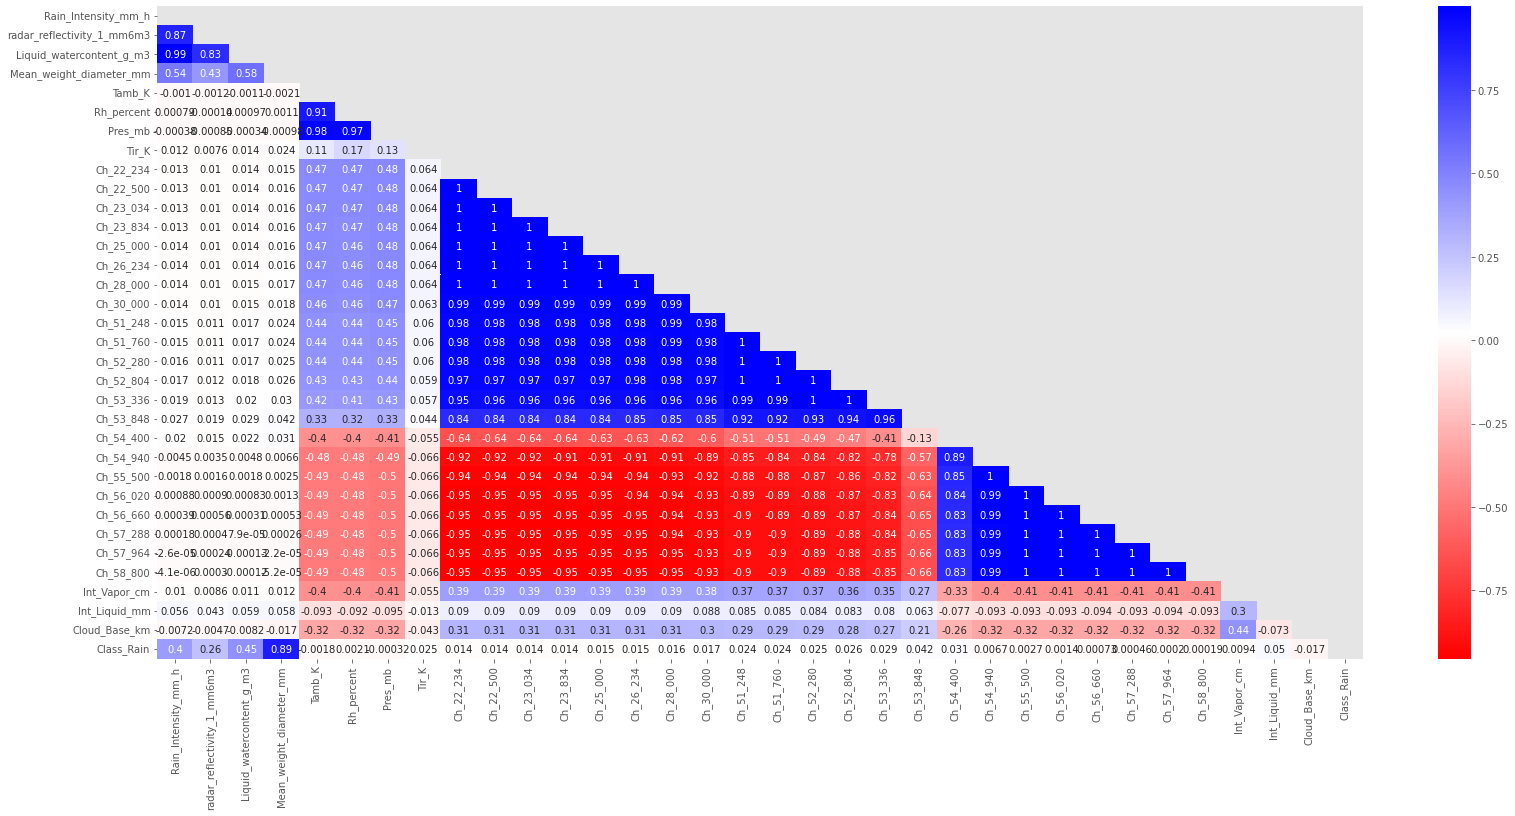

In [164]:
#Finding the Correlation

matrix = np.triu(df_MP3000A_RD80_final.corr())
plt.figure(figsize=(27,12));
sns.heatmap(df_MP3000A_RD80_final.corr(),mask=matrix, annot=True, cmap='bwr_r');

A partir do mapa de calor acima, podemos observar que os muitos recursos estão correlacionados à saída (variável de destino). Vamos visualizar a série temporal da intensidade da chuva, considerando os atributos bem coorelacionados que observamos no HeatMap. 

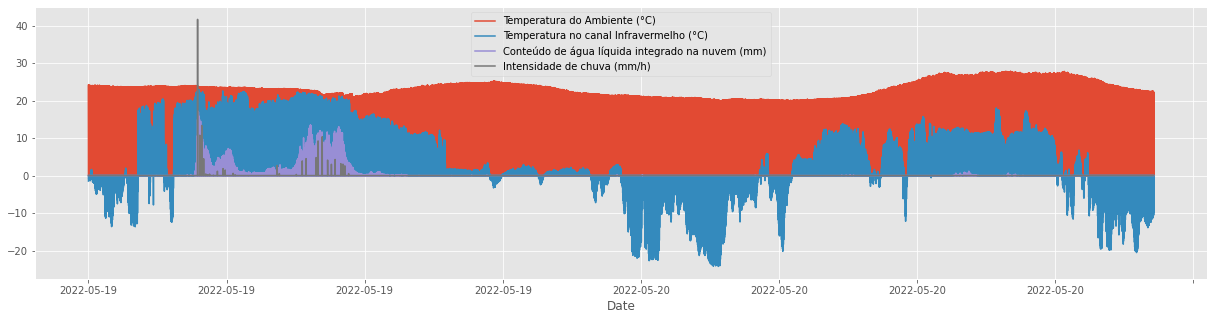

In [165]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_filter_MP3000A_RD80 = df_MP3000A_RD80_temp.query("(Date >= '2022-05-19' and Date <= '2022-05-20')")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [21,5]

df_filter_MP3000A_RD80.plot(kind='line',x='Date',y="Tamb_K", label='Temperatura do Ambiente (°C)', ax=ax)
df_filter_MP3000A_RD80.plot(kind='line',x='Date',y="Tir_K", label='Temperatura no canal Infravermelho (°C)', ax=ax)
df_filter_MP3000A_RD80.plot(kind='line',x='Date',y="Int_Liquid_mm", label='Conteúdo de água líquida integrado na nuvem (mm)', ax=ax)
df_filter_MP3000A_RD80.plot(kind="line",x="Date",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)

# **Modelos de classificação**

In [166]:
#To apply the Machine Learning Algorithm

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression, LinearRegression # Logistic Regression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from graphviz import Digraph

In [167]:
df_MP3000A_RD80_final.columns

Index(['session', 'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm', 'Tamb_K',
       'Rh_percent', 'Pres_mb', 'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034',
       'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000',
       'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336',
       'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020',
       'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm',
       'Int_Liquid_mm', 'Cloud_Base_km', 'Class_Rain'],
      dtype='object')

Vamos dividir o conjunto de dados em **recursos** e **variável de destino**

In [168]:
#Dividir o conjunto de dados em recursos e variável de destino

feature_cols=['Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm', 'Tamb_K',
       'Rh_percent', 'Tir_K', 'Int_Liquid_mm']
       
X = df_MP3000A_RD80_final[feature_cols] # Features
y = df_MP3000A_RD80_final.Class_Rain # Target variable

In [169]:
from sklearn.preprocessing import RobustScaler

In [170]:
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [171]:
X

,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Tamb_K,Rh_percent,Tir_K,Int_Liquid_mm
0,0.0,0.0,0.0,0.0,1.297119,0.838129,9.622898,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.312541
3,0.0,0.0,0.0,0.0,1.297793,0.860178,5.972898,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
983702,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
983703,0.0,0.0,0.0,0.0,1.030318,1.192704,19.862898,0.000000
983704,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
983705,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


Então, estamos preparando os dados dividindo os recursos como X e Y, aqui X define as colunas de recursos e Y define a variável de destino

# **Vamos definir o valor de treino (80%) e teste (20%) para a previsão**

Aqui, dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste com o tamanho de 80% e 20%

In [172]:
# Dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # 80% treino e 20% teste

In [173]:
print(X.shape,X_train.shape,X_test.shape)

(983707, 8) (786965, 8) (196742, 8)


# **Modelo**

In [174]:
import tensorflow as tf

In [175]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(96, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(2, activation = 'softmax')(x)


sgd = tf.keras.optimizers.SGD(learning_rate= 0.01, momentum = 0.2)


model_LSTM = tf.keras.Model(inputs= inputs, outputs = outputs)

In [176]:
model_LSTM.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_7 (Dense)             (None, 96)                864       
                                                                 
 dense_8 (Dense)             (None, 16)                1552      
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 2,450
Trainable params: 2,450
Non-trainable params: 0
_________________________________________________________________


In [177]:
model_LSTM.compile(
    optimizer = sgd,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [178]:
EPOCHS = 100

In [179]:
history = model_LSTM.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size = 32,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/100
19675/19675 [==============================] - 47s 2ms/step - loss: 0.0048 - accuracy: 0.9998 - val_loss: 6.7902e-04 - val_accuracy: 0.9999
Epoch 2/100
19675/19675 [==============================] - 47s 2ms/step - loss: 7.3472e-04 - accuracy: 0.9999 - val_loss: 6.2539e-04 - val_accuracy: 0.9999
Epoch 3/100
19675/19675 [==============================] - 48s 2ms/step - loss: 6.7415e-04 - accuracy: 0.9999 - val_loss: 5.8019e-04 - val_accuracy: 0.9999
Epoch 4/100
19675/19675 [==============================] - 47s 2ms/step - loss: 6.4481e-04 - accuracy: 0.9999 - val_loss: 5.6395e-04 - val_accuracy: 0.9999
Epoch 5/100
19675/19675 [==============================] - 47s 2ms/step - loss: 6.2337e-04 - accuracy: 0.9999 - val_loss: 5.4876e-04 - val_accuracy: 0.9999
Epoch 6/100
19675/19675 [==============================] - 47s 2ms/step - loss: 5.9660e-04 - accuracy: 0.9999 - val_loss: 5.3598e-04 - val_accuracy: 0.9999
Epoch 7/100
19675/19675 [==============================] - 47s 2ms/s

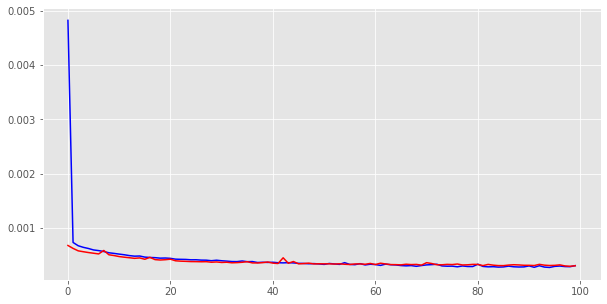

In [180]:
plt.figure(figsize=(10,5))

plt.plot(range(EPOCHS), history.history['loss'], color = 'b')
plt.plot(range(EPOCHS), history.history['val_loss'], color = 'r')

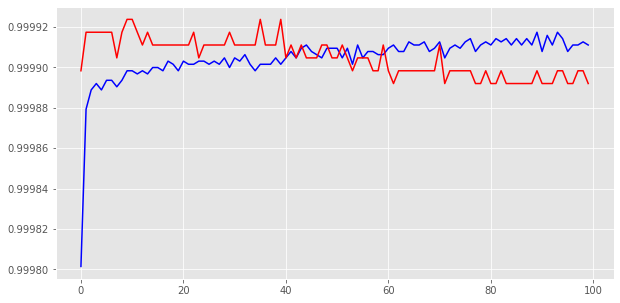

In [181]:
plt.figure(figsize=(10,5))

plt.plot(range(EPOCHS), history.history['accuracy'], color = 'b')
plt.plot(range(EPOCHS), history.history['val_accuracy'], color = 'r')

Com o código abaixo nós podemos encontrar uma época com baixa perda de valor:

In [182]:
np.argmin(history.history['val_loss'])

98

Acurácia do Modelo

In [183]:
print(f'Acurácia do Modelo : {round(model_LSTM.evaluate(X_test, y_test, verbose = 0)[1],4)}%')

Acurácia do Modelo : 0.9999%


In [184]:
from sklearn.metrics import f1_score

In [185]:
y_pred = model_LSTM.predict(X_test)
y_pred

array([[9.999938e-01, 6.185494e-06],
       [9.999938e-01, 6.185494e-06],
       [9.999938e-01, 6.185494e-06],
       ...,
       [9.999938e-01, 6.185482e-06],
       [9.999995e-01, 4.614080e-07],
       [9.999938e-01, 6.185482e-06]], dtype=float32)

In [186]:
y_pred = list(map(lambda x: np.argmax(x), y_pred))

In [187]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [188]:
y_test

1184202    0
847159     0
759050     0
242210     0
392100     0
          ..
1184936    0
762348     0
787474     0
379100     0
778329     0
Name: Class_Rain, Length: 196742, dtype: int64

In [189]:
print(f'F1 Score : {f1_score(y_test, y_pred)} ')

F1 Score : 0.9659863945578231 


# **Confusion Matrix**

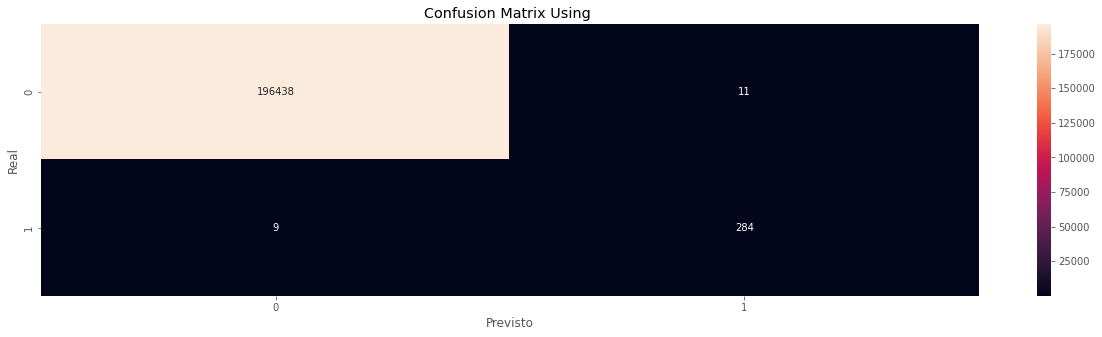

In [190]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix


matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.title("Confusion Matrix Using ")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [191]:
print(accuracy_score(y_test,y_pred))

0.9998983440241535


# **Linear Regression Model**

In [192]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [193]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [194]:
dec_tree_clf = LR.fit(X_train,y_train)

print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 0.0008080807351350566
MSE: 0.0002744372359185364
RMSE: 0.01656614728651585

-------Train Data--------
MAE: 0.0007647187303684379
MSE: 0.00025283360287853995
RMSE: 0.015900742211561698

-----Training Accuracy-------
82.1
-----Testing Accuracy--------
81.5


**RMSE** (Root Mean Squared Error): é a medida que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e predições (hipóteses).
**MAE** (mean Absolut Error): calcula o "erro absoluto médio" dos erros entre valores observados (reais) e predições (hipóteses)

In [195]:
def make_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    categories = ['No','Yes']


    sns.heatmap(cm, annot=labels, fmt='',xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

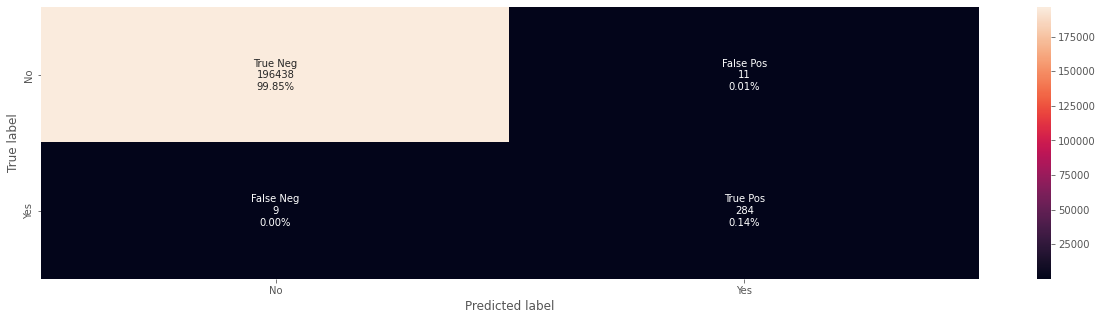

In [196]:
make_confusion_matrix(y_test, y_pred)

# **Modelo LSTM para predição da chuva**

# **Considerações Finais**

No presente notebook, objetivou-se apresentar a implementação de um modelo de RNN - uma LSTM -, que fosse capaz de predizer a chuva. Face do Dataset utilizado e tendo como parâmetro os resultados dos testes, é possível inferir que o modelo treinado obteve resultados satifatórios. No entanto, sugere-se também que usar mais de 01 (uma) LSTM e diferentes parâmetros pode resultar em melhorias na predição da taxa.

Como podemos ver nos gráficos acima, o modelo LSTM conseguiu acompanhar bem as tendência de movimento da taxa de câmbio analisada, nos levando a interpretar que hoive uma boa previsão de qual será a taxa de abertura nos 15 minutos seguintes. É importante destacar que esta foi apenas uma bordagem para curva de aprendizado e, caso queiramos avançar para uma implementação de um modelo para aplicação real, precisaríamos incrementar técnicas de análises mais robustas.

# **Referências**

BASHEER, I. A.; HAJMEER, M. Artificial neural networks: fundamentals, computing, design, and application. Journal of Microbiological Methods, v. 43, p. 3–31, 2000

HAYKIN, Simon. Redes Neurais : princípios e prática. Traduzido por Paulo Martins Engel. 2. ed. Porto Alegre : Bookman, 2001. 900 p. il.

HSU, K. L.; GAO, X.; SOROOSHIAN, S.; GUPTA, H. V. Precipitation estimation from remotely sensed information using artificial neural networks. Journal of Applied Meteorology, v. 36, n. 9, p. 1176-1190, 1997.

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://sites.icmc.usp.br/andre/research/neural/MLP.htm

https://acervolima.com/diferenca-entre-ann-cnn-e-rnn/

KOVAKS, Z. L. Redes Neurais Artificiais: fundamentos e Aplicações. São Paulo: Acadêmica, 1996.

TAFNER, Malcon A.; XEREZ, Marcos de; RODRIGUES FILHO, Ilson W. Redes neurais artificiais : introdução e princípios de neurocomputação. Blumenau : Eko, 1995.

Hinton, Geoffrey, Nitish Srivastava, and Kevin Swersky. “Neural Networks for Machine Learning Lecture 6a Overview of Mini--Batch Gradient Descent,” 2012.